<b>Distances from parallaxes</b>

In principle, if we have a very good measurement of the parallax, we can simply inverse it to get the distance (in kpc, i.e in 1000 pc, where 1 pc=1 parsec = 3.26 light-years). This would work typically if the relative error on the parallax is below 20% at most. If the relative error on the parallax is larger than, then the distribution of distances is no more Gaussian and we cannot make such an approximation. You can see this below, by playing with the relative error on the parallax (relative_error_plx) and see how this changes the distribution of distance.

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import pylab as plt
%matplotlib inline


First, we define a function to compute and plot the distribution of the distance, assuming a normal (i.e. Gaussian) distribution of parallaxes, based on the relative error. The parallax is fixed to 1 mas (i.e. a nominal distance of 1,000 pc), as everything can be scaled to it (this is particularly true, because the error does not depend on the parallax, but on the brightness of the object, its colours, the number of observations and the position in the sky). 
The mean distance should thus be this nominal distance, and the standard deviation should be given by the error_plx (as the parallax is 1). Note, however, how quickly the distribution of distances becoms non-Gaussian and the standard deviation should be asymmetric, and how the mode becomes different from the mean or median.

Parallax= 1.0, with a relative error of 1.0%
Distances vary between  960.7 and 1045.9  pc
Formal distance:  1000.0 +/- 10.0  pc
Mean distance:  1000.0 +/- 10.0  pc
Median of distance distribution:  1000.0  pc
Mode of distance distribution:  999.0  pc


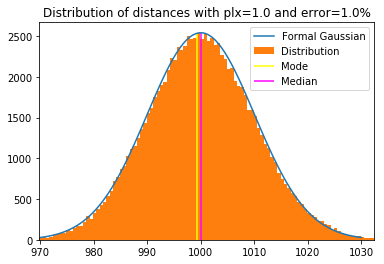

In [8]:
def plotdis(rel_err):
    plx = 1. # in mas; this value doesn't really matter, so we can keep as such
    print(f'Parallax= {plx}, with a relative error of {rel_err}%')
    
    error_plx = rel_err / 100. * plx
    test_par= np.random.normal(plx,error_plx,100000)   # Compute a distribution of parallaxes
    test_dis = 1000./test_par                          # Distances is 1000 / parallax in pc
    test_dis = test_dis [test_dis > 0.]                # Remove the non-physical negative distances

    #print the miminum and maximum distances 
    print ("Distances vary between ",np.round(test_dis.min(),1),"and",np.round(test_dis.max(),1)," pc")

    # Compare to a Gaussian distribution of distances, centred on 1/plx 
    # and with an error given by  
    # error_dis = error_plx / plx**2. 
    dis = 1./plx
    error_dis = error_plx *dis**2. 
    
    # this is in kpc, so multiply by 1000.
    dis, error_dis = 1000.*dis, 1000.*error_dis
    
    xdis = np.linspace(-3.*error_dis,3.*error_dis,100)
    ydis= np.exp(-0.5*(xdis/error_dis)**2)
    
    
    #Compute the histogramme of distances
    bin0 = np.percentile(test_dis,.1)
    bin1 = np.percentile(test_dis,99.9)
    if rel_err > 20:
        bin0 = 0.
        bin1 = 3000./plx
    
    z, bin = np.histogram(test_dis,bins=100,range=(bin0,bin1)) #dis-3.*error_dis,dis+5.*error_dis))
    mo = bin[np.argmax(z)]   # compute the maximum of the histogram, i.e. the mode
    plt.vlines(mo,0,z.max(),color='yellow',label='Mode') 
    med = np.percentile(test_dis,50)   # the median value
    plt.vlines(med,0,z.max(),color='magenta',label='Median')
    
    ydis = ydis * z.max()
    plt.plot(xdis+dis,ydis, label='Formal Gaussian')
    
    plt.hist(test_dis,bins=bin,label='Distribution')
    print("Formal distance: ",np.round(dis,0),"+/-",error_dis," pc")
    print("Mean distance: ",np.round(np.mean(test_dis),0),"+/-",np.round(test_dis.std(),0)," pc")
    print ("Median of distance distribution: ",np.round(med,0)," pc")
    print ("Mode of distance distribution: ",np.round(mo,0)," pc")
    
    plt.xlim(bin0,bin1)
    plt.title(f'Distribution of distances with plx={plx} and error={rel_err}%')
    plt.legend();
    #print('------------------------------------------')


relative_error_plx = 1.  # in percents
plotdis(relative_error_plx)

With a small error, we can see that we have a Gaussian distribution still. Change progressively the value of the relative error on the parallax (from, say, 5% to 50%) below to see how the distribution becomes more and more skewed and it is no more possible to use the inverse of the parallax to define a distance. In particular, when the error is above 33%, it is not improbable that the distance becomes infinite!

Parallax= 1.0, with a relative error of 10.0%
Distances vary between  701.3 and 1799.1  pc
Formal distance:  1000.0 +/- 100.0  pc
Mean distance:  1010.0 +/- 105.0  pc
Median of distance distribution:  1000.0  pc
Mode of distance distribution:  968.0  pc


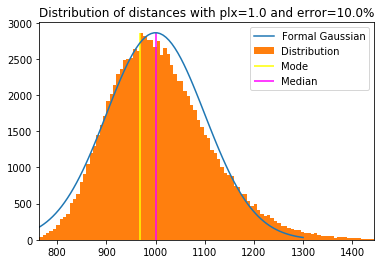

In [13]:
relative_error_plx = 10.  # in percents
plotdis(relative_error_plx)

<i>For the expert:</i> 

Given the above issue, it is difficult to estimate the true distance of an object observed by Gaia if the relative error is larger than 20%. One can estimate some intervals, but the range will be large.
To remedy to this, one can use some priors - for example the fact that the Milky Way has a given distribution of stars and thus a star is more likely to be somewhere (e.g., in the spiral arms) than somewhere else. This is the so-called geometric distance. 
One can also use the fact that a star occupy a given position in the colour-magnitude diagram (or Hertzsprung-Russell diagram) and thus needs to be at a given distance. This is the photo-geometric distance. It is, however, sometimes dangerous as without spectroscopy, we do not know if a star is a main sequence star or a red giant for example, and this could affect significantly its distance.
A reprocessing of all Gaia EDR3 parallax to use such priors has been done by Coryn Bailer-Jones and colleagues and is explained at <a href="https://www2.mpia-hd.mpg.de/homes/calj/gedr3_distances/main.html">https://www2.mpia-hd.mpg.de/homes/calj/gedr3_distances/main.html</a>. The corresponding distances are available via the Gaia science archive or using, for example, the incredible tool <a href="http://www.star.bris.ac.uk/~mbt/topcat/">TopCat</a>.